In [21]:
import numpy as np
import random as rd
import numpy as np
class Labyrinth:
    def __init__(self,shape):
        self.shape=shape
        self.grid=np.zeros(self.shape)
        # We're using binary tree algorithm

    def _carveNorth(self,i,j):
        self.grid[i+1,j]=1
    def _carveEast(self,i,j):
        self.grid[i,j+1]=1

    def generate(self):
        for i in range (self.shape[0]-1):
            for j in range(self.shape[1]-1):
                if i==0 :
                    self._carveEast(i,j)
                if j==self.shape[1]-1:
                    self._carveNorth(i,j)
                else:
                    decision=np.random.randint(0,2)
                    if decision==0:
                        self._carveNorth(i,j)
                    else:
                        self._carveEast(i,j)
        source=(0,0)
        aim=(self.shape[0]-1,self.shape[1]-1)
        self.grid[aim[0],aim[1]]=3
        self.grid[source[0],source[1]]=2
        return self.grid,source,aim

    def _moveLeft(self,a:int ,b:int ) ->bool:
        if a-1<self.shape[0] and b<self.shape[1] and a>=0 and b>=0:
            return True
        return False
    def _moveRight(self,a:int ,b:int ) ->bool:
        if a+1<self.shape[0] and b<self.shape[1] and a>=0 and b>=0:
            return True
        return False
    def _moveUp(self,a:int ,b:int ) ->bool:
        if a<self.shape[0] and b+1<self.shape[1] and a>=0 and b>=0:
            return True
        return False
    def _moveDown(self,a:int ,b:int ) ->bool:
        if a<self.shape[0] and b-1<self.shape[1] and a>=0 and b>=0:
            return True
        False
    def neighbours(self,lab,a:int,b:int)->list[list]:
        neighbours_list=[]
        if self._moveRight(a,b) and (lab[a+1,b]==1 or lab[a+1,b]==3 or lab[a+1,b]==2):
            neighbours_list.append((a+1,b))
        if self._moveLeft(a,b) and (lab[a-1,b]==1 or lab[a-1,b]==3 or lab[a-1,b]==2):
            neighbours_list.append((a-1,b))
        if self._moveUp(a,b) and (lab[a,b+1]==1 or lab[a,b+1]==3 or lab[a,b+1]==2):
            neighbours_list.append((a,b+1))
        if self._moveDown(a,b) and (lab[a,b-1]==1 or lab[a,b-1]==3 or lab[a,b-1]==2):

            neighbours_list.append((a,b-1))
        return neighbours_list
    
class File:
    def __init__(self):
        self.file=[]
    def first(self):
        return self.file[0]
    def isEmpty(self):
        if len(self.file)==0:
            return True
        return False
    def enfile(self,point:tuple):
        self.file.append(point)
    def defile(self):
        self.file.pop(0)

class bfs_solver:
    def __init__ (self,lab:np.ndarray,source,aim):
        self.lab=lab
        self.source=source
        self.aim=aim
   
    def treat(self):
        file = File() # To visit nodes
        laby=Labyrinth(self.lab.shape)
        file.enfile(tuple(self.source))
        dist={tuple(self.source): 0 }
        parent={tuple(self.source): None}
        color={"white":[],
               "grey":[],
               "black":[]}
        for i in range( self.lab.shape[0]) :
            for j in range (self.lab.shape[1]):
                if (self.lab[i,j]==1 or self.lab[i,j]==2 or self.lab[i,j]==3):
                    color["white"].append((i,j)) 
        while not file.isEmpty():
            vertice=file.first()
            for neighbour in laby.neighbours(self.lab,vertice[0],vertice[1]):
                if  neighbour in color["white"]:
                    color["grey"].append(neighbour)
                    color["white"].remove(neighbour)
                    dist[tuple(neighbour)]=dist[tuple(vertice)]+1
                    parent[tuple(neighbour)]=vertice
                    file.enfile(tuple(neighbour))
            file.defile()
            color["black"].append(tuple(vertice))
            if tuple(vertice) in color["grey"]:
                color["grey"].remove(tuple(vertice))
        return dist,parent,color
    
    def backtracking(self,parent,source,aim):
        path=[]
        current=aim
        if tuple(aim) not in parent:
            return None  # Aim is unreachable
        while current != source:
            path.append(current)
            current=parent[current]
        path.append(source)
        path.reverse()
        return path
    
    def solve(self):
        dist,parent,color=self.treat()
        path=self.backtracking(parent,tuple(self.source),tuple(self.aim))
        return path
    
class bellman_ford_solver:
        def __init__ (self,lab:np.ndarray,source,aim):
            self.lab=lab
            self.source=source
            self.aim=aim
        def treat(self):
            dist={}
            parent={}
            for i in range(self.lab.shape[0]):
                for j in range(self.lab.shape[1]):
                    if self.lab[i,j]==2 or self.lab[i,j]==3 or self.lab[i,j]==1:
                        dist[(i,j)]=float('inf')
                        parent[(i,j)]=None
            dist[tuple(self.source)]=0
            laby=Labyrinth(self.lab.shape)
            for _ in range(len(dist)-1):
                for u in dist.keys():
                    for v in laby.neighbours(self.lab,u[0],u[1]):
                        if v in dist:
                            if dist[u]+1<dist[v]:
                                dist[v]=dist[u]+1
                                parent[v]=u

            # Check for negative-weight cycles (not applicable here since all weights are positive but...)
            for u in dist.keys():
                    for v in laby.neighbours(self.lab,u[0],u[1]):
                        if v in dist:
                            if dist[u]+1<dist[v]:
                                raise ValueError("Graph contains a negative-weight cycle") # That is not possible here but generally good to check
            return dist,parent
        def backtracking(self,parent,source,aim):
            path=[]
            current=aim
            if tuple(aim) not in parent:
                return None  # Aim is unreachable
            while current != source:
                path.append(current)
                current=parent[current]
            path.append(source)
            path.reverse()
            return path
        def solve(self):
            dist,parent=self.treat()
            path=self.backtracking(parent,self.source,self.aim)
            return path
        

BFS optimal path length: 199


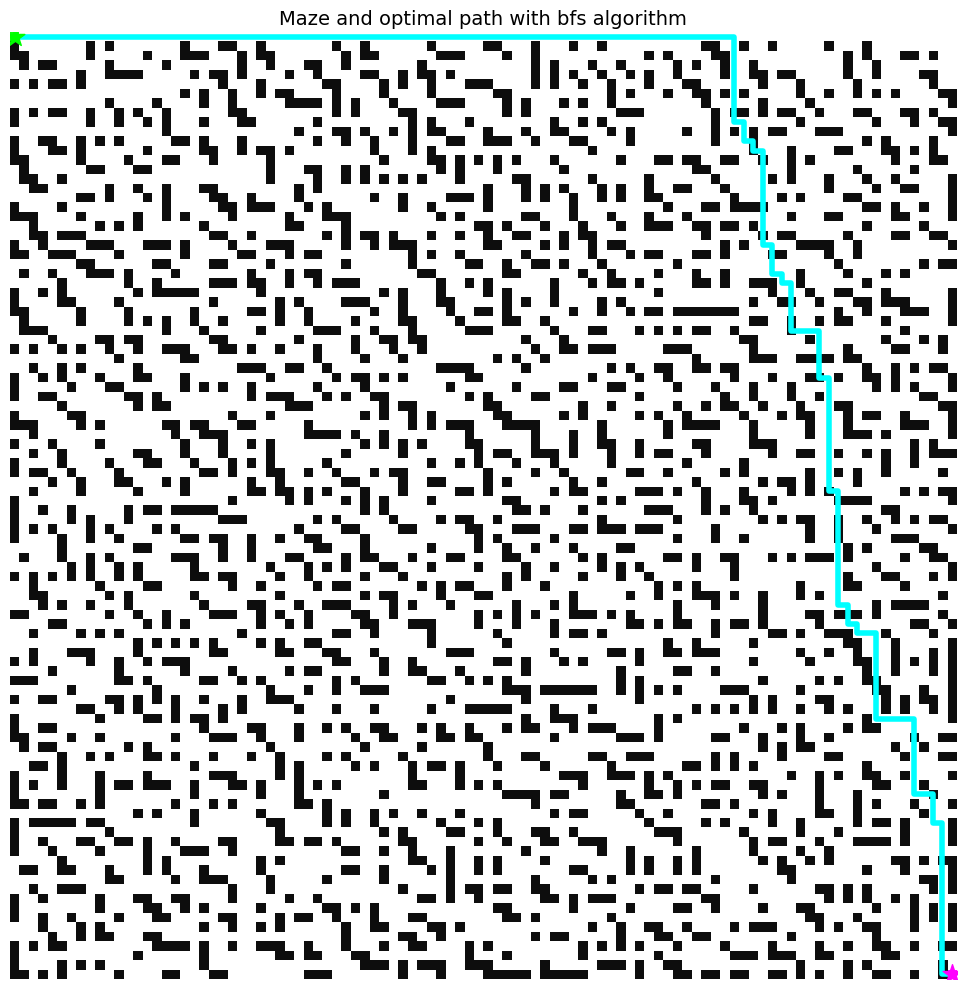

In [22]:

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


labyrinth=Labyrinth((100,100))
lab,source,aim=labyrinth.generate()
bfs_solver=bfs_solver(lab,source,aim)
optimal_path_bfs=bfs_solver.solve()

#Vizualisation of bfs_solver result (generated with gpt5-mini)
plt.figure(figsize=(10,10))
cmap=ListedColormap(['black', 'white', 'lime', 'magenta'])
plt.imshow(lab, cmap=cmap, interpolation='nearest', origin='upper', alpha=0.95, aspect='equal')
y, x = zip(*optimal_path)
plt.plot(x, y, color='cyan', linewidth=4, solid_capstyle='round', zorder=3)
plt.scatter([source[1]], [source[0]], color='lime', marker='*', s=200, zorder=4, label='Start')
plt.scatter([aim[1]], [aim[0]], color='magenta', marker='*', s=200, zorder=4, label='End')
plt.title("Maze and optimal path with bfs algorithm", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.savefig("labyrinthe.png", dpi=300)
print("BFS optimal path length:", len(optimal_path_bfs))
plt.show()


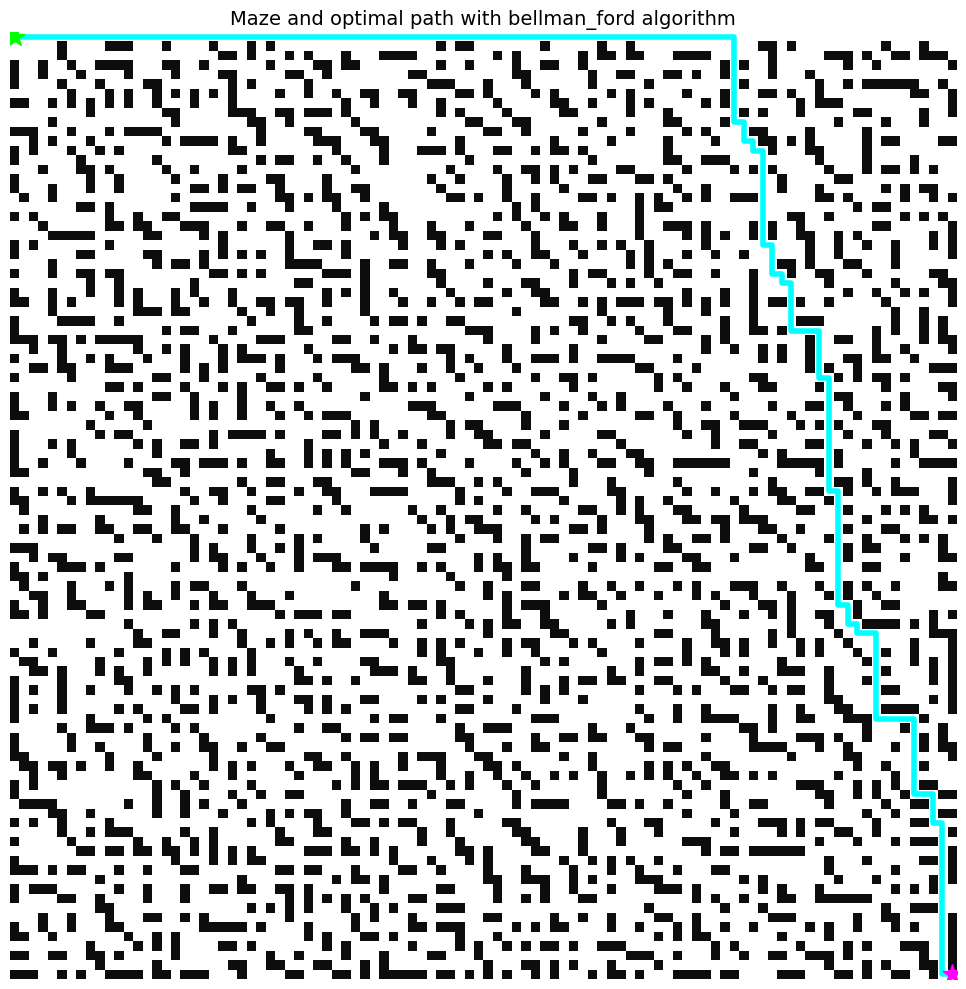

In [18]:
bellman_=bellman_ford_solver(lab,source,aim)
optimal_path=bellman_.solve()

#Vizualisation of bellman_ford_solver result (generated with gpt5-mini)
cmap=ListedColormap(['black', 'white', 'lime', 'magenta'])
plt.figure(figsize=(10,10))
plt.imshow(lab, cmap=cmap, interpolation='nearest', origin='upper', alpha=0.95, aspect='equal')
y, x = zip(*optimal_path)
plt.plot(x, y, color='cyan', linewidth=4, solid_capstyle='round', zorder=3)
plt.scatter([source[1]], [source[0]], color='lime', marker='*', s=200, zorder=4, label='Start')
plt.scatter([aim[1]], [aim[0]], color='magenta', marker='*', s=200, zorder=4, label='End')
plt.title("Maze and optimal path with bellman_ford algorithm", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.savefig("labyrinthe.png", dpi=300)
plt.show()

In [19]:
print("Bellman-Ford optimal path length:", len(optimal_path))

Bellman-Ford optimal path length: 199
